In [1]:
import os 

In [2]:
os.chdir('/users/mac/我的项目/MyCode')

## Tushare

In [3]:
#先引入后面分析、可视化等可能用到的库
import tushare as ts
import pandas as pd  
import matplotlib.pyplot as plt

#设置token
token='693c84c2aca4dc7b941439006bd946413706e7a9560bf3cce0369bb3'
#ts.set_token(token)
pro = ts.pro_api(token)

In [4]:
#获取当前上市的股票代码、简称、注册地、行业、上市时间等数据
basic=pro.stock_basic(list_status='L')
#查看前五行数据
#basic.head(5)

#获取平安银行日行情数据
pa=pro.daily(ts_code='000001.SZ', start_date='20180101',
               end_date='20190106')
pa.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20190104,9.24,9.82,9.22,9.75,9.28,0.47,5.0647,1481159.06,1422149.888
1,000001.SZ,20190103,9.18,9.33,9.15,9.28,9.19,0.09,0.9793,415537.95,384457.707
2,000001.SZ,20190102,9.39,9.42,9.16,9.19,9.38,-0.19,-2.0256,539386.32,498695.109
3,000001.SZ,20181228,9.31,9.46,9.31,9.38,9.28,0.10,1.0776,576604.00,541571.004
4,000001.SZ,20181227,9.45,9.49,9.28,9.28,9.30,-0.02,-0.2151,624593.27,586343.755


In [5]:
#文件存储路径

file = '/Users/mac/我的项目/MyCode/data/jiaoyi/'
#定义获取多只股票函数：
def get_stocks_data(stocklist,start,end):
    all_data={}
    for code in stocklist:
        all_data[code]=pro.daily(ts_code=code,
                 start_date=start, end_date=end)
    return all_data

#保存本地
def save_data(all_data):
    for code,data in all_data.items():
        data.to_csv(file+code+'.csv',
                     header=True, index=False)

stocklist=list(basic.ts_code)[:15]
start=''
end=''
all_data=get_stocks_data(stocklist,start,end)

all_data['000002.SZ'].tail()

#将数据保存到本地
save_data(all_data)

#读取本地文件夹里所有文件
import os

g=os.walk(file)
filenames=[]
for path,d,filelist in g:
    for filename in filelist:
        filenames.append(os.path.join(filename))
print(filenames);

#将读取的数据文件放入一个字典中
df={}
#从文件名中分离出股票代码
code=[name.split('.')[0] for name in filenames]
for i in range(len(filenames)):
    filename=file+filenames[i]
    df[code[i]]=pd.read_csv(filename)

#查看第一只股票前五行数据
#df[code[0]].head()

['000010.SZ.csv', '000002.SZ.csv', '000012.SZ.csv', '000016.SZ.csv', '000008.SZ.csv', '000004.SZ.csv', '000006.SZ.csv', '000014.SZ.csv', '000011.SZ.csv', '000001.SZ.csv', '000009.SZ.csv', '000017.SZ.csv', '000005.SZ.csv', '000007.SZ.csv', '000019.SZ.csv']


In [6]:
def get_index_data(indexs):
    '''indexs是字典格式'''
    index_data={}
    for name,code in indexs.items():
        df=pro.index_daily(ts_code=code)
        df.index=pd.to_datetime(df.trade_date)   
        index_data[name]=df.sort_index()
    return index_data

In [7]:
#获取常见股票指数行情
indexs={'上证综指': '000001.SH','深证成指': '399001.SZ',
         '沪深300': '000300.SH','创业板指': '399006.SZ',
          '上证50': '000016.SH', '中证500': '000905.SH',
         '中小板指': '399005.SZ','上证180': '000010.SH'}
index_data=get_index_data(indexs)

In [8]:
index_data['上证综指'].head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
1990-12-19,000001.SH,19901219,99.98,96.05,99.98,95.79,100.00,-0.02,-0.0200,1260.0,494.311
1990-12-20,000001.SH,19901220,104.39,104.30,104.39,99.98,99.98,4.41,4.4109,197.0,84.992
1990-12-21,000001.SH,19901221,109.13,109.07,109.13,103.73,104.39,4.74,4.5407,28.0,16.096
1990-12-24,000001.SH,19901224,114.55,113.57,114.55,109.13,109.13,5.42,4.9666,32.0,31.063
1990-12-25,000001.SH,19901225,120.25,120.09,120.25,114.55,114.55,5.70,4.9760,15.0,6.510


In [9]:
a = pa.loc[:,['open','close','low','high']].values

## K线图可视化

In [11]:
from pyecharts.charts import Kline
pa.index=pd.to_datetime(pa.trade_date)
pa=pa.sort_index()
v1=pa.loc[:,['open','close','low','high']].values.tolist()
t=pa.index
v0=list(t.strftime('%Y%m%d'))
kline=(
 Kline()
     .add_xaxis(v0)
     .add_yaxis("平安银行K线图", v1)
#      .set_global_opts(
#          yaxis_opts=opts.AxisOpts(is_scale=True),
#          xaxis_opts=opts.AxisOpts(is_scale=True),
#          title_opts=opts.TitleOpts(title="平安银行K线图"),
#      )
)
kline.render("./data/上证指数图.html")

'/Users/mac/我的项目/MyCode/data/上证指数图.html'

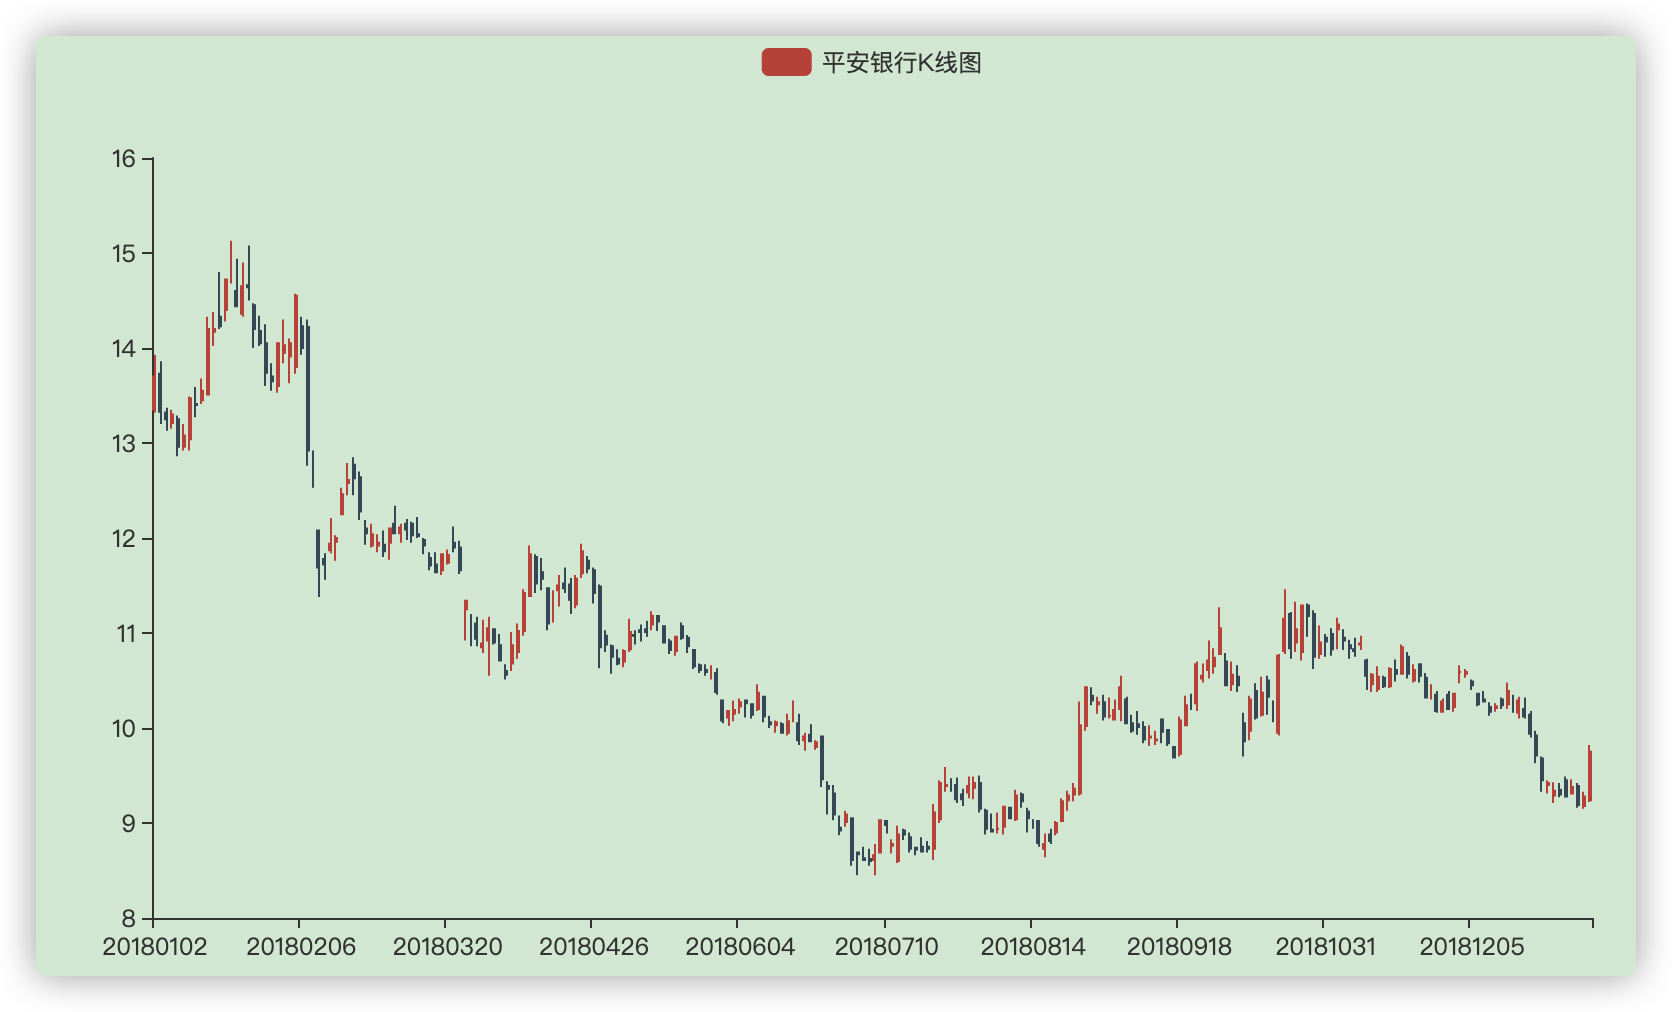

## 对股价走势进行可视化分析

<IPython.core.display.Javascript object>

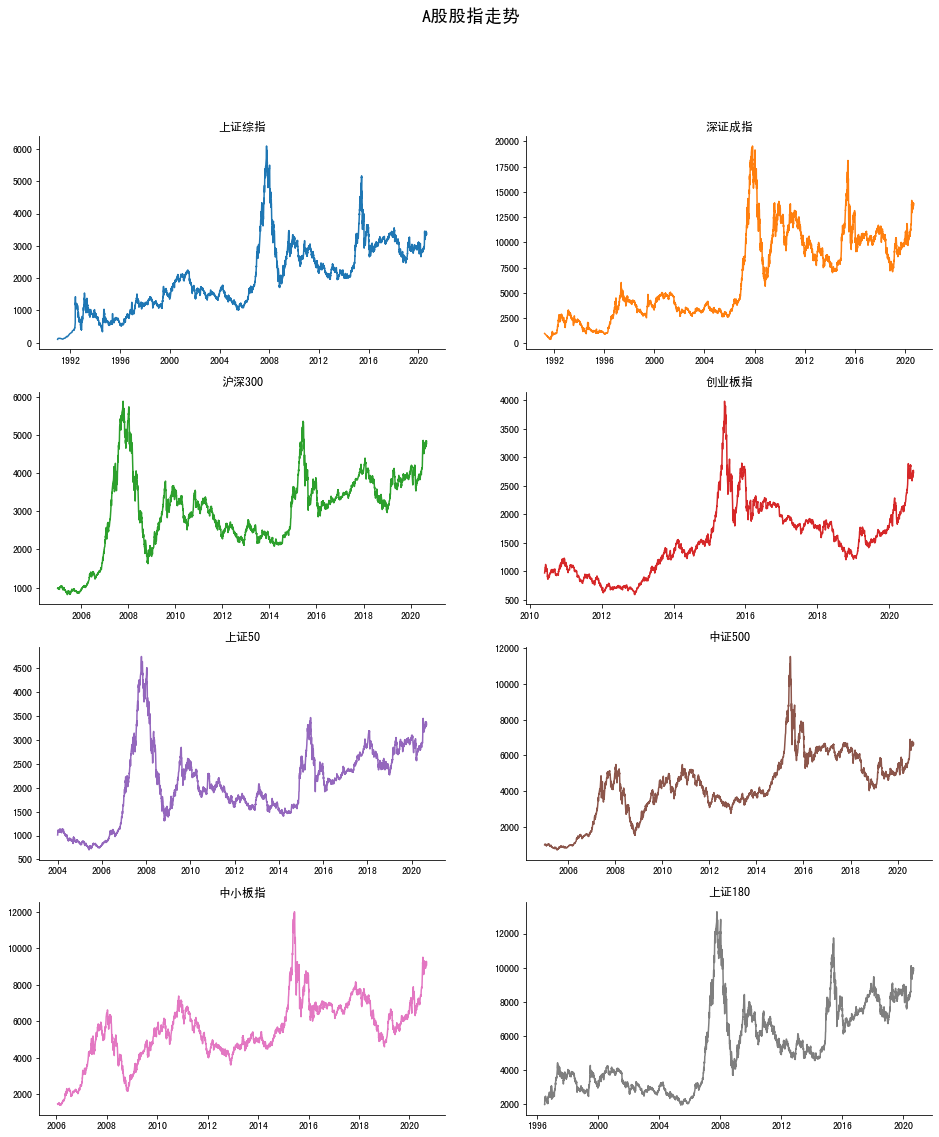

In [12]:
subjects =list(index_data.keys())
#每个子图的title
plot_pos = [421,422,423,424,425,426,427,428] 
# 每个子图的位置
new_colors = ['#1f77b4','#ff7f0e', '#2ca02c', 
'#d62728','#9467bd','#8c564b', '#e377c2', 
'#7f7f7f','#bcbd22','#17becf']

fig = plt.figure(figsize=(16,18))
fig.suptitle('A股股指走势',fontsize=18)
for pos in np.arange(len(plot_pos)):       
    ax = fig.add_subplot(plot_pos[pos]) 
    y_data =index_data[subjects[pos]]['close']    
    b = ax.plot(y_data,color=new_colors[pos])   
    ax.set_title(subjects[pos])    
    # 将右上边的两条边颜色设置为空，相当于抹掉这两条边
    ax = plt.gca()  
    ax.spines['right'].set_color('none') 
    ax.spines['top'].set_color('none')    
plt.show()  

## 证券宝

login success!
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4528 entries, 2000-01-04 to 2018-09-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    4528 non-null   object
 1   code    4528 non-null   object
 2   open    4528 non-null   object
 3   high    4528 non-null   object
 4   low     4528 non-null   object
 5   close   4528 non-null   object
dtypes: object(6)
memory usage: 247.6+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4528 entries, 2000-01-04 to 2018-09-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4528 non-null   object 
 1   code    4528 non-null   object 
 2   open    4528 non-null   float64
 3   high    4528 non-null   float64
 4   low     4528 non-null   float64
 5   close   4528 non-null   float64
dtypes: float64(4), object(2)
memory usage: 247.6+ KB


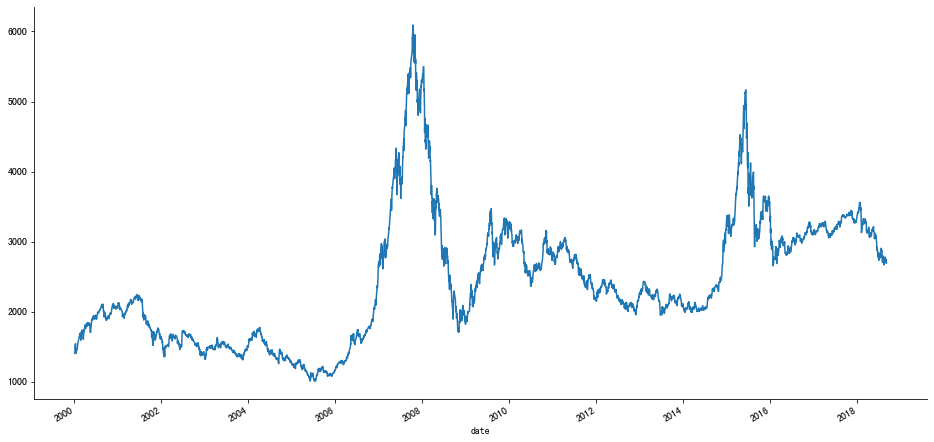

In [13]:
import baostock as bs
#### 登陆系统 ####
lg = bs.login()

#### 获取历史K线数据 ####
# query_history_k_data()
fields= "date,code,open,high,low,close"
rs = bs.query_history_k_data("sh.000001", fields,
    start_date='2000-01-01', end_date='2018-09-07', 
    frequency="d", adjustflag="2") 
#frequency="d"取日k线，adjustflag="3"默认不复权，
#1：后复权；2：前复权

data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
result.index=pd.to_datetime(result.date)
#### 结果集输出到csv文件 ####
#result.to_csv("c:/zjy/history_k_data.csv", 
#        encoding="gbk", index=False)
result.head()
#### 登出系统 ####
#bs.logout()

result.info()

#将某些object转化numeric
result=result.apply(pd.to_numeric, errors='ignore')
result.info()

result.close.plot(figsize=(16,8))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')    
plt.show() 

## Yfinance 

/Users/mac/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

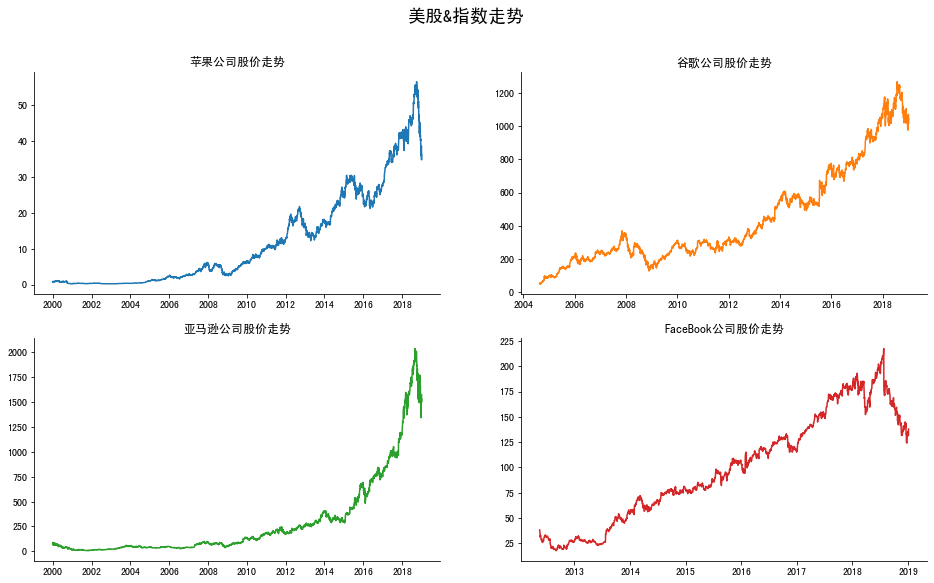

In [14]:
import yfinance as fy
fy.pdr_override()

def get_data(tick,start_date="2000-01-01", end_date="2019-01-07"):
    data = fy.download(tick, start=start_date, end=end_date)
    return data

tickers=['AAPL', 'GOOG','AMZN','FB']
all_data = {}
for ticker in tickers:
    all_data[ticker]=get_data(ticker)

subjects = ['苹果公司股价走势','谷歌公司股价走势',
      '亚马逊公司股价走势','FaceBook公司股价走势'] 
#每个子图的title
plot_pos = [221,222,223,224] # 每个子图的位置
new_colors = ['#1f77b4','#ff7f0e', '#2ca02c', 
'#d62728', '#9467bd','#8c564b', '#e377c2',
'#7f7f7f','#bcbd22','#17becf']

fig = plt.figure(figsize=(16,9))
fig.suptitle('美股&指数走势',fontsize=18)
for pos in np.arange(len(plot_pos)):       
    ax = fig.add_subplot(plot_pos[pos]) 
    y_data = all_data[tickers[pos]]['Adj Close']    
    b = ax.plot(y_data,color=new_colors[pos])   
    ax.set_title(subjects[pos])  
    ax = plt.gca()  
    ax.spines['right'].set_color('none') 
    ax.spines['top'].set_color('none') 

plt.show() 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

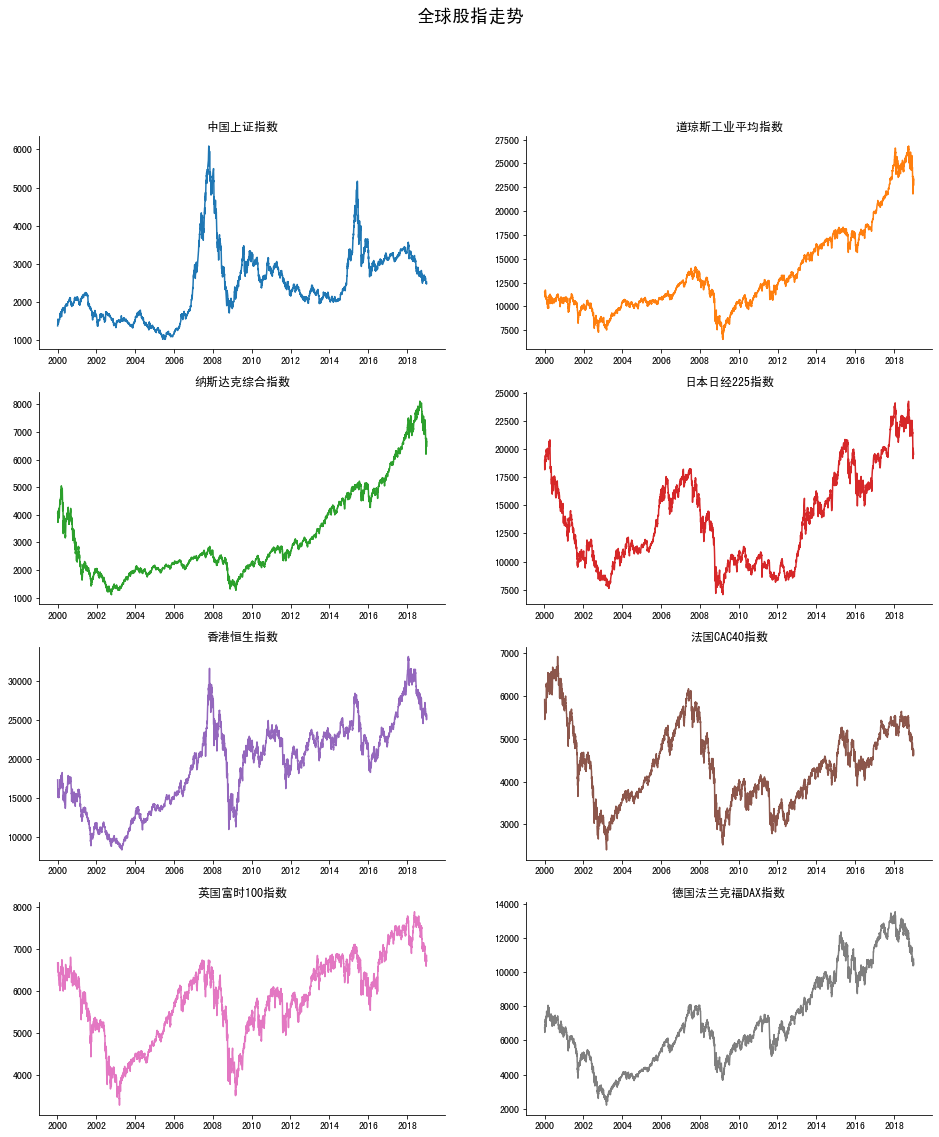

In [15]:
WorldStockIndexList = {

    '000001.SS':'中国上证指数',
    '^DJI':'道琼斯工业平均指数',
    '^IXIC':'纳斯达克综合指数',
    '^N225':'日本日经225指数',
    '^HSI' :'香港恒生指数',
    '^FCHI':'法国CAC40指数', 
    '^FTSE':'英国富时100指数', 
    '^GDAXI':'德国法兰克福DAX指数'}
world_data={}
for ticker in WorldStockIndexList.keys():
    world_data[ticker]=get_data(ticker)

subjects =list(WorldStockIndexList.values())
tickers=list(WorldStockIndexList)
#每个子图的title
plot_pos = [421,422,423,424,425,426,427,428] 
# 每个子图的位置
new_colors = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728',
             '#9467bd','#8c564b', '#e377c2',
             '#7f7f7f','#bcbd22','#17becf']

fig = plt.figure(figsize=(16,18))
fig.suptitle('全球股指走势',fontsize=18)
for pos in np.arange(len(plot_pos)):       
    ax = fig.add_subplot(plot_pos[pos]) 
    y_data =world_data[tickers[pos]]['Adj Close']    
    b = ax.plot(y_data,color=new_colors[pos])   
    ax.set_title(subjects[pos])    
    ax = plt.gca()  
    ax.spines['right'].set_color('none') 
    ax.spines['top'].set_color('none') 
plt.show() 